In [1]:
#Colab Setup
%tensorflow_version 2.x

from google.colab import drive
drive.mount('/content/gdrive')

!pip install pymorphy2

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 7.1MB 6.4MB/s 


In [0]:
import sys
sys.path.append("/content/gdrive/My Drive/smu-ABAE/classes")

review_corpus_path = "/content/gdrive/My Drive/smu-ABAE/data/tech_review_sent_corpus.pkl"
vocab_path = "/content/gdrive/My Drive/smu-ABAE/data/vocab-text-review.txt"
emb_filename = '/content/gdrive/My Drive/smu-ABAE/models/w2v_embedding'
aspect_file_path = "/content/gdrive/My Drive/smu-ABAE/results/aspect.json"
aspect_model_path = '/content/gdrive/My Drive/smu-ABAE/results/model_param'


In [0]:
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")
    sys.path.append(module_path+"/classes")

review_corpus_path = "../data/tech_review_sent_corpus.pkl"
vocab_path = "../data/glove-tech-revew-vocab.txt"
emb_filename = '../models/w2v_embedding'
aspect_file_path = "../results/aspect.json"
aspect_model_path = "../results/model_param"
vocab_path = "../data/vocab-text-review.txt"


In [4]:
import pandas as pd
import pickle

with open(review_corpus_path,"rb") as f:
    tech_review_corpus = pickle.load(f)

print(len(tech_review_corpus))
display(pd.DataFrame(tech_review_corpus).head(10))

reviews = pd.DataFrame(tech_review_corpus).review.tolist()

156991


,index,review
0,299,great people care make difference
1,299,management care employee well providing contin...
2,1145,powerhouse epc went heavy worksharing
3,1145,send much work overseas possible keep core person
4,1145,heavy loaded management
5,1145,chase project hire thousand oil booming
6,1145,turn lay thousand going
7,1145,sharpest spike hiring laying
8,1145,employee clearly greatest asset
9,1375,much could add


In [0]:
## Parmeters

In [0]:
from numpy.random import seed
import tensorflow as tf
seed(76244)
tf.random.set_seed(76244)

import ABAE.utils as U
parser = U.add_common_args()

#Paramaters
maxlen = 115 #Based on 2 standard deviations from mean
algorithm = "adam"
neg_size = 20
emb_dim = 200
aspect_size = 15
ortho_reg = 0.1
batch_size = 32
epochs = 15

## Setup Data

Max Character length 1280
Average Character Length 42.96894089470097
Standard Deviation 35.620449460499906
Median Character Length 35.0
Characters 2 standard deviations from mean 114.20983981570078


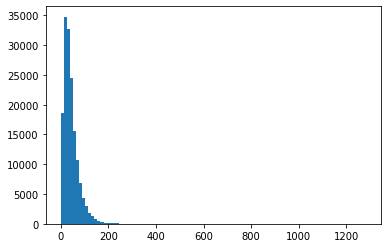

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
word_length = pd.DataFrame(tech_review_corpus).review.apply(len).tolist()

print("Max Character length", max(word_length))
print("Average Character Length", np.mean(word_length))
print("Standard Deviation", np.std(word_length))
print("Median Character Length", np.median(word_length))
print("Characters 2 standard deviations from mean", np.mean(word_length) + (2*np.std(word_length)))

plt.hist(word_length,bins=100)
plt.show()

In [0]:
# import importlib

# importlib.reload(dataset)

In [7]:
from keras.preprocessing import sequence
import ABAE.reader as dataset

vocab, train_x, overall_maxlen = dataset.get_data(reviews, vocab_path, vocab_size=0, maxlen=maxlen)
train_x = sequence.pad_sequences(train_x, maxlen=overall_maxlen)

vocab_inv = {}
for w, ind in vocab.items():
    vocab_inv[ind] = w
    
# train_x = train_x[0:30000]
print('Number of training examples: ', len(train_x))
print('Length of vocab: ', len(vocab))

 Creating vocab ...
   944162 total words, 23125 unique words
 Reading dataset ...
  train set
   <num> hit rate: 1.24%, <unk> hit rate: 0.00%
Number of training examples:  148425
Length of vocab:  23128


In [0]:
print("Validate index to word")
print( [vocab_inv[i] for i in train_x[2] ] )
print("\n")
print( [vocab_inv[i] for i in train_x[0] ] )

Validate index to word
['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pa

## Attention-Based-Aspect-Detection Code

In [0]:
# import importlib
# import ABAE.optimizers
# importlib.reload(ABAE.optimizers)

In [0]:
# import importlib
# import ABAE.w2vEmbReader
# importlib.reload(ABAE.w2vEmbReader)

Create Word Embedding and Aspect Embeddings

In [8]:
import importlib
import ABAE.model
importlib.reload(ABAE.model)

<module 'ABAE.model' from '/content/gdrive/My Drive/smu-ABAE/classes/ABAE/model.py'>

In [11]:
import logging
import os

# from ABAE.my_layers import Attention, Average, WeightedSum, WeightedAspectEmb, MaxMargin
# from ABAE.w2vEmbReader import W2VEmbReader as EmbReader
from ABAE.optimizers import get_optimizer, sentence_batch_generator, negative_batch_generator
import ABAE.model as m

optimizer = get_optimizer(algorithm)
  
model = m.create_model(overall_maxlen, vocab, aspect_size, neg_size, emb_filename, ortho_reg)
# freeze the word embedding layer
model.get_layer('word_emb').trainable = False
model.compile(optimizer=optimizer, loss=U.max_margin_loss, metrics=[U.max_margin_loss])

print(model.summary())

2020-05-27 00:32:22,965 INFO Loading embeddings from: /content/gdrive/My Drive/smu-ABAE/models/w2v_embedding
2020-05-27 00:32:22,969 INFO loading Word2VecKeyedVectors object from /content/gdrive/My Drive/smu-ABAE/models/w2v_embedding
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-27 00:32:23,851 INFO loading wv recursively from /content/gdrive/My Drive/smu-ABAE/models/w2v_embedding.wv.* with mmap=None
2020-05-27 00:32:23,852 INFO setting ignored attribute vectors_norm to None
2020-05-27 00:32:23,855 INFO loading vocabulary recursively from /content/gdrive/My Drive/smu-ABAE/models/w2v_embedding.vocabulary.* with mmap=None
2020-05-27 00:32:23,857 INFO loading trainables recursiv

  #vectors: 44626, #dimensions: 200
Initializing word embedding matrix
18162/23128 word vectors initialized (hit rate: 78.53%)
Initializing aspect embedding matrix as centroid of kmean clusters
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sentence_input (InputLayer)     (None, 115)          0                                            
__________________________________________________________________________________________________
word_emb (Embedding)            multiple             4625600     sentence_input[0][0]             
                                                                 neg_input[0][0]                  
__________________________________________________________________________________________________
average_3 (Average)             (None, 200)          0           word_emb[0][0]                 

In [12]:
import logging
import numpy as np
from time import time
import json
import keras.backend as K

logging.basicConfig(
    # filename='out.log',
    level=logging.INFO,
    format='%(asctime)s %(levelname)s %(message)s')
logger = logging.getLogger(__name__)

from tqdm import tqdm

logger.info("-"*80)
    
sen_gen = sentence_batch_generator(train_x, batch_size)
neg_gen = negative_batch_generator(train_x, batch_size, neg_size)
batches_per_epoch = len(train_x) // batch_size

min_loss = float('inf')
for ii in range(epochs):
    t0 = time()
    loss, max_margin_loss = 0., 0.

    for b in tqdm(range(batches_per_epoch)):
        sen_input = next(sen_gen)
        neg_input = next(neg_gen)

        batch_loss, batch_max_margin_loss = model.train_on_batch([sen_input, neg_input],
                                                                 np.ones((batch_size, 1)))
        loss += batch_loss / batches_per_epoch
        max_margin_loss += batch_max_margin_loss / batches_per_epoch

    tr_time = time() - t0

    if loss < min_loss:
        min_loss = loss
        word_emb = K.get_value(model.get_layer('word_emb').embeddings)
        aspect_emb = K.get_value(model.get_layer('aspect_emb').W)
        word_emb = word_emb / np.linalg.norm(word_emb, axis=-1, keepdims=True)
        aspect_emb = aspect_emb / np.linalg.norm(aspect_emb, axis=-1, keepdims=True)
#         aspect_file = open(aspect_file_path, 'wt', encoding='utf-8')
        aspect = {}
        model.save(aspect_model_path)
        
        for ind in range(len(aspect_emb)):
            desc = aspect_emb[ind]
            sims = word_emb.dot(desc.T)
            ordered_words = np.argsort(sims)[::-1]
            desc_list = { vocab_inv[w]:str(sims[w]) for w in ordered_words[:100]}
            print('Aspect %d:' % ind)
            print(desc_list)
#             aspect_file.write('Aspect %d:\n' % ind)
#             aspect_file.write(' '.join(desc_list) + '\n\n')
            aspect['Aspect %d:' % ind] = desc_list

        with open(aspect_file_path, "w") as f:
            json.dump(aspect, f)
    
    print('Epoch %d, train: %is' % (ii, tr_time))
    print('Total loss: %.4f, max_margin_loss: %.4f, ortho_reg: %.4f' % (loss, max_margin_loss, loss - max_margin_loss))
    

2020-05-27 00:33:10,223 INFO --------------------------------------------------------------------------------
100%|██████████| 4638/4638 [01:08<00:00, 67.72it/s]


Aspect 0:
{'grab': '0.45581478', 'grabbing': '0.40704975', 'station': '0.4047541', 'downstairs': '0.39410335', 'wipe': '0.3930214', 'closet': '0.38318813', 'fridge': '0.38000473', 'hanger': '0.37881914', 'clock': '0.37864375', 'pick': '0.37392583', 'noisy': '0.3711042', 'jam': '0.37024164', 'wash': '0.36645705', 'clean': '0.36645085', 'vacuum': '0.36600372', 'cage': '0.36564893', 'workstation': '0.3609681', 'retrieve': '0.36050457', 'sanitized': '0.35856074', 'space': '0.35736513', 'dusty': '0.3569706', 'scan': '0.35499322', 'restock': '0.3548179', 'nonstop': '0.35416195', 'bin': '0.35314566', 'stow': '0.35221684', 'rack': '0.35165778', 'dump': '0.351621', 'picking': '0.35154942', 'strip': '0.3513617', 'lunchroom': '0.3512349', 'floor': '0.35066077', 'refrigerator': '0.34957165', 'loud': '0.3492058', 'usually': '0.34911448', 'broom': '0.34599617', 'quick': '0.3458376', 'mellow': '0.34566802', 'crowded': '0.34449005', 'cramped': '0.34414828', 'straighten': '0.34333423', 'packed': '0.343

  0%|          | 0/4638 [00:00<?, ?it/s]

Epoch 0, train: 68s
Total loss: 6.0864, max_margin_loss: 5.9640, ortho_reg: 0.1224


  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'grab': '0.37736535', 'super': '0.36791885', 'brightly': '0.36340076', 'lunchroom': '0.35074317', 'lounge': '0.3421929', 'wash': '0.3402792', 'wipe': '0.33990714', 'clock': '0.33461726', 'clean': '0.33057132', 'fridge': '0.3303443', 'pick': '0.32982105', 'mellow': '0.3284253', 'downstairs': '0.32771432', 'log': '0.3274999', 'breakroom': '0.32622135', 'watch': '0.3244812', 'worksite': '0.32406092', 'scan': '0.3237168', 'popcorn': '0.32317007', 'timed': '0.31822976', 'sanitized': '0.31627226', 'soda': '0.31552836', 'retrieve': '0.3152715', 'quiet': '0.31487393', 'station': '0.31477806', 'wii': '0.3145734', 'relaxing': '0.3122074', 'ring': '0.311694', 'snack': '0.3116235', 'grabbing': '0.31159002', 'coffe': '0.30956244', 'vacuum': '0.30948627', 'space': '0.30856198', 'headphone': '0.30792052', 'tee': '0.30686706', 'pong': '0.30641478', 'locker': '0.30615526', 'supper': '0.30519065', 'loud': '0.30222243', 'quick': '0.30143112', 'downtime': '0.30130166', 'hanger': '0.30095285', '

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'grab': '0.3768794', 'super': '0.3621688', 'brightly': '0.36019456', 'clock': '0.35871208', 'wash': '0.3443775', 'clean': '0.34346375', 'lunchroom': '0.3411553', 'wipe': '0.3393734', 'pick': '0.3363067', 'log': '0.3334083', 'lounge': '0.3316994', 'scan': '0.32813972', 'watch': '0.32542533', 'worksite': '0.3214028', 'retrieve': '0.32000488', 'fridge': '0.31977767', 'locker': '0.31973848', 'breakroom': '0.3191077', 'ring': '0.31870753', 'supper': '0.3173371', 'organize': '0.31439131', 'downstairs': '0.31310594', 'sanitized': '0.31272352', 'mellow': '0.31196642', 'snack': '0.30921543', 'popcorn': '0.30702993', 'quiet': '0.30665475', 'wii': '0.30513722', 'rejuvenate': '0.30399448', 'relaxing': '0.30340737', 'tee': '0.3031876', 'grabbing': '0.30302548', 'straighten': '0.30278558', 'pong': '0.30249995', 'soda': '0.3008862', 'station': '0.30070603', 'vacuum': '0.3001409', 'timed': '0.2993372', 'restock': '0.29661158', 'hanger': '0.29648894', 'recycle': '0.29557133', 'tell': '0.2950

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'grab': '0.37234357', 'clock': '0.36938247', 'super': '0.35238302', 'brightly': '0.34628835', 'clean': '0.33958694', 'wash': '0.33793223', 'pick': '0.3378447', 'log': '0.33178857', 'wipe': '0.33080387', 'lunchroom': '0.3255682', 'locker': '0.32344648', 'scan': '0.32317257', 'watch': '0.32131243', 'lounge': '0.31797186', 'ring': '0.31635344', 'organize': '0.31531066', 'supper': '0.31524432', 'retrieve': '0.31449413', 'tell': '0.310859', 'quiet': '0.30706596', 'worksite': '0.30677038', 'breakroom': '0.3045181', 'fridge': '0.3044048', 'mellow': '0.3037846', 'straighten': '0.30356222', 'downstairs': '0.30299306', 'sanitized': '0.30168006', 'go': '0.29947612', 'snack': '0.29907686', 'tee': '0.29886666', 'relaxing': '0.29752547', 'relax': '0.29666615', 'rejuvenate': '0.29630876', 'aloud': '0.29423052', 'folded': '0.29400146', 'wii': '0.29388744', 'grabbing': '0.29371908', 'pong': '0.2924499', 'regroup': '0.29227632', 'popcorn': '0.29215467', 'station': '0.29173535', 'restock': '0.

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.3817472', 'grab': '0.37608054', 'clean': '0.346284', 'super': '0.34547257', 'wash': '0.3390544', 'pick': '0.33813983', 'brightly': '0.33653247', 'log': '0.33494583', 'wipe': '0.33405045', 'locker': '0.33370674', 'tell': '0.32146472', 'lunchroom': '0.3212555', 'scan': '0.31972718', 'ring': '0.31904116', 'watch': '0.3174985', 'organize': '0.3164931', 'lounge': '0.316277', 'supper': '0.31492662', 'retrieve': '0.31419304', 'go': '0.31298864', 'straighten': '0.3107874', 'quiet': '0.30828178', 'regroup': '0.30714166', 'aloud': '0.30128863', 'relax': '0.30101317', 'fridge': '0.30098617', 'sanitized': '0.30013984', 'folded': '0.29938424', 'snack': '0.2993221', 'breakroom': '0.29875535', 'downstairs': '0.29766017', 'tee': '0.29744187', 'grabbing': '0.29713893', 'mellow': '0.2953355', 'arrive': '0.29477537', 'rejuvenate': '0.29464883', 'relaxing': '0.29428056', 'restock': '0.29211664', 'station': '0.29196692', 'try': '0.29153466', 'worksite': '0.2913397', 'sit': '0.2905479

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.3838793', 'grab': '0.36911058', 'clean': '0.3494789', 'super': '0.34707883', 'pick': '0.33600843', 'wash': '0.33587587', 'locker': '0.33356804', 'brightly': '0.3334454', 'wipe': '0.3316275', 'log': '0.3312231', 'tell': '0.32103664', 'lunchroom': '0.31908104', 'ring': '0.31628376', 'supper': '0.31625858', 'go': '0.31595913', 'watch': '0.31546432', 'scan': '0.3150775', 'lounge': '0.3108043', 'straighten': '0.31050906', 'organize': '0.3092119', 'regroup': '0.30918157', 'quiet': '0.30870014', 'retrieve': '0.30557582', 'relax': '0.30352032', 'sanitized': '0.29991987', 'folded': '0.29912734', 'breakroom': '0.2988595', 'aloud': '0.2988302', 'snack': '0.29846564', 'arrive': '0.2983181', 'fridge': '0.2980058', 'mellow': '0.2977357', 'relaxing': '0.297443', 'tee': '0.2964065', 'downstairs': '0.2955743', 'rejuvenate': '0.2935113', 'try': '0.29250574', 'grabbing': '0.29178652', 'sit': '0.2900778', 'punch': '0.2890913', 'station': '0.28812513', 'restock': '0.28804654', 'arcad

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.3860084', 'grab': '0.36632037', 'clean': '0.35073596', 'super': '0.34478778', 'pick': '0.33488235', 'wash': '0.33453986', 'locker': '0.33338317', 'wipe': '0.3300351', 'log': '0.32895812', 'brightly': '0.32888138', 'tell': '0.32560268', 'go': '0.32314026', 'scan': '0.31515902', 'ring': '0.31474608', 'supper': '0.31410894', 'lunchroom': '0.31211564', 'quiet': '0.3116042', 'regroup': '0.3115355', 'watch': '0.311245', 'straighten': '0.31047413', 'organize': '0.3093599', 'relax': '0.3067718', 'lounge': '0.3038073', 'retrieve': '0.30149347', 'folded': '0.2989245', 'relaxing': '0.29885024', 'try': '0.29859555', 'arrive': '0.29840815', 'mellow': '0.2977696', 'sanitized': '0.29677376', 'aloud': '0.29629552', 'tee': '0.29304248', 'breakroom': '0.2915081', 'fridge': '0.29070258', 'snack': '0.29065347', 'downstairs': '0.29048178', 'punch': '0.29024678', 'sit': '0.2900073', 'rejuvenate': '0.28779614', 'restock': '0.28679714', 'hanger': '0.28556123', 'grabbing': '0.28552297', 

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.38377225', 'grab': '0.36369747', 'super': '0.34706122', 'clean': '0.34693193', 'pick': '0.33308876', 'wash': '0.33303547', 'locker': '0.33087578', 'wipe': '0.3273729', 'brightly': '0.32607996', 'tell': '0.32538563', 'log': '0.32352763', 'go': '0.32034734', 'supper': '0.3137853', 'ring': '0.31272894', 'regroup': '0.31248093', 'quiet': '0.31179017', 'watch': '0.31135792', 'scan': '0.3106469', 'lunchroom': '0.3090986', 'straighten': '0.3075386', 'relax': '0.30635688', 'organize': '0.30261654', 'lounge': '0.30098906', 'mellow': '0.3004601', 'relaxing': '0.2999152', 'try': '0.29704624', 'folded': '0.2967211', 'retrieve': '0.29535323', 'arrive': '0.29517168', 'aloud': '0.29423788', 'tee': '0.2932949', 'sanitized': '0.29261458', 'breakroom': '0.29122254', 'downstairs': '0.29052427', 'sit': '0.29029435', 'punch': '0.28934592', 'rejuvenate': '0.2884986', 'snack': '0.2882198', 'fridge': '0.28785723', 'talk': '0.28519195', 'pull': '0.2843107', 'restock': '0.28414318', 'grab

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.38294965', 'grab': '0.3613575', 'super': '0.35127836', 'clean': '0.34804612', 'wash': '0.3322096', 'pick': '0.329531', 'locker': '0.32947004', 'wipe': '0.32628256', 'tell': '0.32593718', 'brightly': '0.32377413', 'go': '0.32338494', 'log': '0.32073826', 'supper': '0.31805328', 'quiet': '0.31312293', 'regroup': '0.31168342', 'watch': '0.30967104', 'ring': '0.30933887', 'relax': '0.30930927', 'scan': '0.3087553', 'straighten': '0.30712587', 'lunchroom': '0.30670327', 'mellow': '0.30089948', 'relaxing': '0.30067', 'organize': '0.30065805', 'try': '0.30057764', 'lounge': '0.2976632', 'folded': '0.29558212', 'arrive': '0.29320908', 'tee': '0.29216617', 'retrieve': '0.29154766', 'aloud': '0.29142892', 'sanitized': '0.29031575', 'downstairs': '0.29014078', 'breakroom': '0.2901163', 'punch': '0.28999302', 'sit': '0.28878677', 'rejuvenate': '0.28769225', 'snack': '0.28698075', 'talk': '0.28624475', 'til': '0.28549895', 'fridge': '0.28472817', 'pull': '0.2841127', 'fold': 

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.3809748', 'grab': '0.3565338', 'super': '0.35434115', 'clean': '0.34670287', 'pick': '0.3299349', 'locker': '0.32794535', 'wash': '0.3264464', 'tell': '0.32527947', 'go': '0.32409728', 'brightly': '0.32396466', 'wipe': '0.32145107', 'supper': '0.31959033', 'quiet': '0.31638813', 'log': '0.31405872', 'regroup': '0.3132034', 'relax': '0.312503', 'ring': '0.30793568', 'watch': '0.3070276', 'straighten': '0.30629432', 'mellow': '0.30542246', 'relaxing': '0.30516958', 'scan': '0.30447567', 'lunchroom': '0.30410847', 'try': '0.29961765', 'organize': '0.29544574', 'lounge': '0.29470286', 'folded': '0.29453674', 'arrive': '0.29012665', 'sit': '0.28984648', 'tee': '0.28942996', 'aloud': '0.28910846', 'breakroom': '0.28887725', 'downstairs': '0.28815752', 'sanitized': '0.28812057', 'talk': '0.28809586', 'rejuvenate': '0.2879995', 'til': '0.2871219', 'punch': '0.28701842', 'snack': '0.28632152', 'crazy': '0.2863167', 'retrieve': '0.28423142', 'busies': '0.28382224', 'fold':

  0%|          | 0/4638 [00:00<?, ?it/s]

Epoch 10, train: 65s
Total loss: 4.7534, max_margin_loss: 4.6456, ortho_reg: 0.1078


  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.38007522', 'super': '0.35858282', 'grab': '0.35319728', 'clean': '0.3484115', 'wash': '0.32702777', 'pick': '0.3258648', 'locker': '0.32533062', 'tell': '0.3246506', 'quiet': '0.32371795', 'brightly': '0.32252672', 'go': '0.32242677', 'supper': '0.3220684', 'wipe': '0.32006007', 'relax': '0.31948423', 'regroup': '0.31450334', 'relaxing': '0.3128463', 'mellow': '0.3107953', 'log': '0.30705023', 'watch': '0.30620998', 'straighten': '0.30557594', 'ring': '0.30551195', 'try': '0.3053344', 'lunchroom': '0.30316594', 'scan': '0.29824245', 'folded': '0.29418948', 'crazy': '0.29282597', 'lounge': '0.29207468', 'organize': '0.29182142', 'breakroom': '0.29140887', 'tee': '0.29089573', 'talk': '0.2902831', 'arrive': '0.28950292', 'til': '0.28905427', 'sit': '0.28899643', 'rejuvenate': '0.28898597', 'downstairs': '0.2889791', 'aloud': '0.2878753', 'busies': '0.2867589', 'snack': '0.28604016', 'sanitized': '0.28539723', 'eat': '0.28530097', 'punch': '0.2849856', 'fold': '0.28

  0%|          | 0/4638 [00:00<?, ?it/s]

Aspect 0:
{'clock': '0.38018262', 'super': '0.36225566', 'grab': '0.3513559', 'clean': '0.3467418', 'tell': '0.32730994', 'go': '0.32595614', 'pick': '0.324736', 'wash': '0.32426512', 'quiet': '0.32371676', 'locker': '0.3233645', 'supper': '0.32185245', 'brightly': '0.31969878', 'relax': '0.31961104', 'wipe': '0.31814894', 'regroup': '0.31495595', 'relaxing': '0.3135822', 'mellow': '0.31243926', 'watch': '0.30632865', 'ring': '0.30529404', 'try': '0.3050784', 'log': '0.30507684', 'straighten': '0.30336878', 'lunchroom': '0.2987332', 'scan': '0.2981592', 'crazy': '0.29398018', 'talk': '0.29177612', 'sit': '0.29153723', 'folded': '0.2890658', 'arrive': '0.28900778', 'lounge': '0.28873444', 'til': '0.28871495', 'get': '0.2871094', 'organize': '0.286995', 'breakroom': '0.28660735', 'rejuvenate': '0.28588343', 'aloud': '0.285846', 'downstairs': '0.28574774', 'busies': '0.28566802', 'punch': '0.28562915', 'eat': '0.28543696', 'tee': '0.28472394', 'sanitized': '0.28372484', 'fold': '0.2816367

  0%|          | 0/4638 [00:00<?, ?it/s]

Epoch 13, train: 64s
Total loss: 4.7475, max_margin_loss: 4.6397, ortho_reg: 0.1078


100%|██████████| 4638/4638 [01:04<00:00, 71.46it/s]

Epoch 14, train: 64s
Total loss: 4.7466, max_margin_loss: 4.6388, ortho_reg: 0.1078
